<a href="https://colab.research.google.com/github/RioDeMilo/RETAIL-PRICES-COLOMBIA/blob/main/IPC1823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Here it is all the libraries that i need in order to manage the data and to plot it `
import scipy as sci
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
import matplotlib.dates as mdates

In [6]:
# for this project i previously modified all the data from each year of analysis to a sngle sheet page in excel. 
df = pd.read_excel('/content/Gropu19-22.xlsx')

In [8]:
# This will get you the specified sheet page for further use.
# but for this case i used a excel file ith only one page so it is not necessary and you need to ad the datafrme and a dicttionary ith the name of the pages like
# sheet_name=['Hoja1']
#df = df.get('Hoja1')


# Data preparing
### Now we want to specify wheter we want to plot a spicified type of product 
but we should be able to see what type of products are available for comparison

```
# Tiene formato de código
```



In [9]:

# typical use of .info() to get a general idea of what is the shape  of the data base look like
# .head() will let you see a more friendly view in a excel way 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220517 entries, 0 to 220516
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Fecha                   220517 non-null  datetime64[ns]
 1   Grupo                   220517 non-null  object        
 2   Producto                220517 non-null  object        
 3   Fuente                  220517 non-null  object        
 4   Precio  por kilogramo*  220517 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.4+ MB


,Fecha,Grupo,Producto,Fuente,Precio por kilogramo*
0,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0
1,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0
2,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0
3,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0
4,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0


In [10]:
df.rename(columns={"Precio  por kilogramo*": "Precio KG"}, inplace=True)

In [11]:
# this is to set the 'Fecha' as the new index of the dataframe as it will mostly be a timeline analysis
# the inplace=True will set this ne index as the definitive index changing it in the database
df.set_index('Fecha', inplace=True)
df.head()

,Grupo,Producto,Fuente,Precio KG
Fecha,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0


In [12]:
# Here we can see that there are not null values in any of the columns
# if there were any null values we should take them into consideration because it can affect later anaylsis an graphing
pd.isnull(df).sum()

Grupo        0
Producto     0
Fuente       0
Precio KG    0
dtype: int64

In [13]:
# Here i'm seeing that the city is contained in the same column as the WHOLESALE center 
# we need to solve this after starting to gragh and do an analysis
df['Fuente'].value_counts()

Medellín, Central Mayorista de Antioquia       10154
Bogotá, D.C., Corabastos                        8070
Cúcuta, Cenabastos                              6865
Villavicencio, CAV                              6383
Ibagué, Plaza La 21                             6214
                                               ...  
Malambo, Atlantico                                46
Malambo (Atlántico), Carnes y Carnes              23
Ipiales (Nariño), Centro de Acopio                18
San Gil (Santander), Panela                        4
San Sebastián de Mariquita (Tolima), panela        3
Name: Fuente, Length: 91, dtype: int64

In [14]:
# the process of split the values that have both the city and the WHOLESALE market need to be in a independet column
# but here you can see that there are values in the data base that have more than one comma that is dividing the values 
# bogota dc, corabastos should not have two commas only the comma that is differentiating it from a city and a market in the city
# we want then to get only two columns and not three
# i first used str.split but it split the string everytime that it find a comma
# it's best to use str.rsplit as it will start from the end to find a delimeter
df[['Ciudad','Plaza']] = df.Fuente.str.rsplit(',',n=1, expand = True)

In [15]:
# in the star of the dataframe we can see that there are valuess that include the city but not the marketplace 
# it is important to take this into consideration
df.head()


,Grupo,Producto,Fuente,Precio KG,Ciudad,Plaza
Fecha,,,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0,Armenia,Mercar
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0,Barranquilla,Barranquillita
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0,"Bogotá, D.C.",Corabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0,Bucaramanga,Centroabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0,Chiquinquirá (Boyacá),None


In [16]:
# here we count every vale from 0 to 50 to see whether there is a city misspelled

df.Ciudad.value_counts()[0:50]

Bogotá, D.C.                        18734
Medellín                            15561
Cali                                14576
Barranquilla                         9971
Cúcuta                               9715
Pereira                              8878
Bucaramanga                          8756
Villavicencio                        6383
Ibagué                               6214
Valledupar                           5986
Montería                             5959
Armenia                              5921
Popayán                              5647
Palmira (Valle del Cauca)            5523
Manizales                            5514
Neiva                                5476
Tuluá (Valle del Cauca)              5420
Cartagena                            5350
Sincelejo                            5249
Pasto                                4864
Tunja                                4837
Cartago (Valle del Cauca)            4716
Buenaventura (Valle del Cauca)       4320
Pamplona (Norte de Santander)     

In [17]:
# i droped the Fuente value as it will not give me any value since 
# you will need the city and maybe a specific WHOLESALE market called "Plaza"
df = df.drop(['Fuente'],axis=1)
# here you can confirm that the data base is still the same only without the "Fuente" Column
df.head()

,Grupo,Producto,Precio KG,Ciudad,Plaza
Fecha,,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1065.0,Armenia,Mercar
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,3000.0,Barranquilla,Barranquillita
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,764.0,"Bogotá, D.C.",Corabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1556.0,Bucaramanga,Centroabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1058.0,Chiquinquirá (Boyacá),None


In [18]:
# this is another part of the data cleaning and filtering 
#we see duplicates with differences in the upper letters
df['Grupo'].value_counts()


FRUTAS                           53015
VERDURAS Y HORTALIZAS            43664
CARNES                           32565
PROCESADOS                       32080
TUBERCULOS, RAICES Y PLATANOS    16948
GRANOS Y CEREALES                13366
PESCADOS                         10352
LACTEOS Y HUEVOS                  9418
Frutas                            2261
Verduras y Hortalizas             1893
Carnes                            1429
Procesados                        1387
Tubérculos, Raíces y Plátanos      704
Granos y Cereales                  578
Pescados                           448
Lácteos y Huevos                   409
Name: Grupo, dtype: int64

In [19]:
# as you can see the str.lower will change all the 
# upper letters for lower case
df['Grupo'] = df['Grupo'].str.lower()

df['Grupo'].value_counts()

frutas                           55276
verduras y hortalizas            45557
carnes                           33994
procesados                       33467
tuberculos, raices y platanos    16948
granos y cereales                13944
pescados                         10800
lacteos y huevos                  9418
tubérculos, raíces y plátanos      704
lácteos y huevos                   409
Name: Grupo, dtype: int64

In [20]:
# you can se the dict of values that i'm going to replce with the .replace function
dic = {'é': 'e', 'í': 'i','á':'a'}

In [21]:
df.replace(dic, regex=True, inplace=True)

In [22]:
df['Grupo'].value_counts()

frutas                           55276
verduras y hortalizas            45557
carnes                           33994
procesados                       33467
tuberculos, raices y platanos    17652
granos y cereales                13944
pescados                         10800
lacteos y huevos                  9827
Name: Grupo, dtype: int64

In [23]:
# now we need to see wheter there may be other values such as ó or ú 
# for this we need to analyse the other types of products from each category 
# but instead we will find this values and if it exists in the data base
# if those values exists we will addd them to the dictionary to then replace them and get an homogeneus list


In [24]:
# Thiss code reveal that there are no ó or ú in the data base that need to be replaced
# Then the code above of .replace wwill work just fine
### remember to add a list for ú and ó too
df['Grupo'].str.count('ú').sum()


0

In [25]:
df['Ciudad'].value_counts()[0:50]

Bogota, D.C.                        18734
Medellin                            15561
Cali                                14576
Barranquilla                         9971
Cúcuta                               9715
Pereira                              8878
Bucaramanga                          8756
Villavicencio                        6383
Ibague                               6214
Valledupar                           5986
Monteria                             5959
Armenia                              5921
Popayan                              5647
Palmira (Valle del Cauca)            5523
Manizales                            5514
Neiva                                5476
Tulua (Valle del Cauca)              5420
Cartagena                            5350
Sincelejo                            5249
Pasto                                4864
Tunja                                4837
Cartago (Valle del Cauca)            4716
Buenaventura (Valle del Cauca)       4320
Pamplona (Norte de Santander)     

In [26]:
# here you can write the dicttionary if you would like to select multiple cities 
C = ['Bogota, D.C.']
df2 = df[df['Grupo'].isin(C)]


In [27]:
# here i replace the tring with a value o it is more easy to get values and analyze them witouth touching the principal code
# here noww e dont acll the list inide the iin function
# instead i used a vaariable to store a list that caaan containt all the types of groups of goods
G = ['frutas']
df2 = df[df['Grupo'].isin(G)]
df2['Producto'].value_counts()[0:30]

Tomate de arbol                 2262
Manzana verde importada         1848
Lulo                            1830
Mora de Castilla                1806
Manzana roja importada          1760
Guayaba pera                    1721
Banano criollo                  1709
Pera importada                  1606
Papaya Maradol                  1597
Manzana royal gala importada    1565
Maracuya                        1546
Aguacate papelillo              1533
Mango Tommy                     1521
Limón Tahiti                    1444
Limón común                     1404
Granadilla                      1347
Uva Isabela                     1328
Piña gold                       1309
Melón Cantalup                  1254
Naranja Valencia                1231
Patilla                         1188
Guanabana                       1183
Fresa                           1172
Curuba                          1101
Kiwi                            1067
Uva red globe nacional           880
Piña perolera                    832
M

In [28]:
P = ['Coco']
dfp = df2[df2["Producto"].isin(P)]
dfpc = df2[(df2["Producto"].isin(P)) & (df2['Ciudad'].isin(C))]

In [31]:
dfpc

,Grupo,Producto,Precio KG,Ciudad,Plaza
Fecha,,,,,
2019-01-01,frutas,Coco,3012.0,"Bogota, D.C.",Corabastos
2019-02-01,frutas,Coco,3303.0,"Bogota, D.C.",Corabastos
2019-03-01,frutas,Coco,3314.0,"Bogota, D.C.",Corabastos
2019-04-01,frutas,Coco,3327.0,"Bogota, D.C.",Corabastos
2019-05-01,frutas,Coco,3621.0,"Bogota, D.C.",Corabastos
2019-06-01,frutas,Coco,3748.0,"Bogota, D.C.",Corabastos
2019-07-01,frutas,Coco,3743.0,"Bogota, D.C.",Corabastos
2019-08-01,frutas,Coco,3743.0,"Bogota, D.C.",Corabastos
2019-09-01,frutas,Coco,3732.0,"Bogota, D.C.",Corabastos


##Idea
### create a function where if you dont choose a city you get a dataframe with all the countries and only the products given if not then return a dataframe with the product and city given

In [32]:
# the join function map wil give us utomticlly the title of the entire grapichs that we are making
t = 'Precio KG de '+(' '.join(map(str, P)))+' en '+(' '.join(map(str, C)))


Text(0.5, 1.0, 'Precio KG de Coco en Bogota, D.C.')

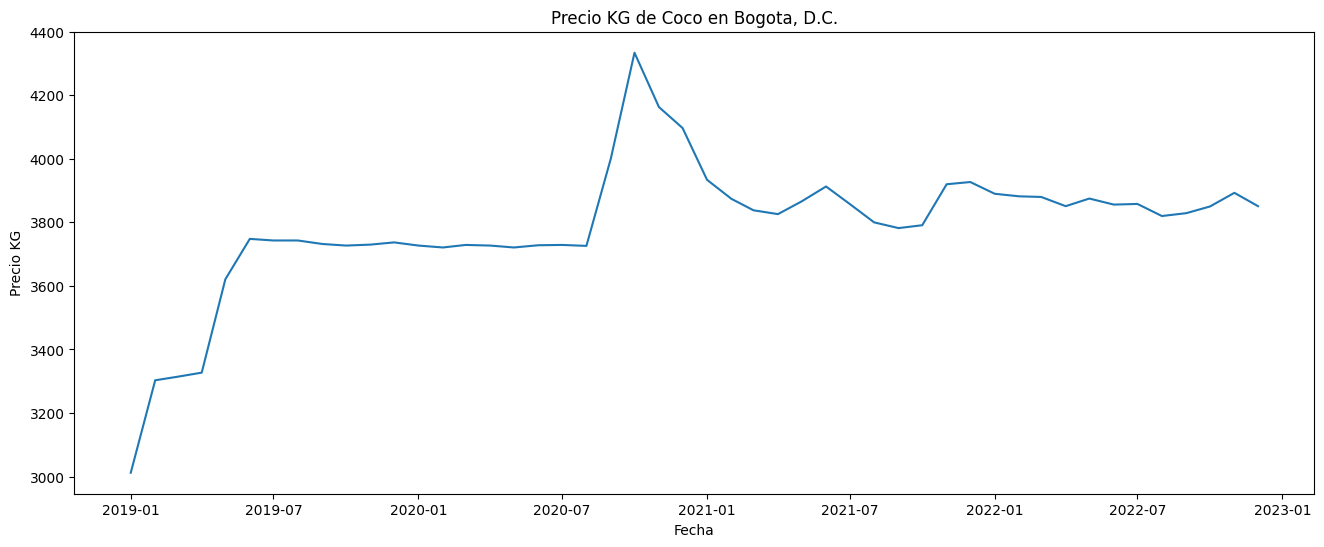

In [33]:
# why are we seeing a strange graph?
# There are different value for the cities all raound the country we need to configure the data to bether understaand this
fig, ax = plt.subplots(figsize=(16, 6)) # thiss saves the fig  in the ax 
ax = sns.lineplot(data=dfpc, x="Fecha", y="Precio KG")# the ax value i the plotting of the cart
ax.set(
xlabel="Fecha",
ylabel="Precio KG",
)
ax.set_title(t)

In [34]:
dfpc.describe()

,Precio KG
count,48.000000
mean,3787.583333
std,211.271514
min,3012.000000
25%,3728.750000
50%,3823.000000
75%,3876.250000
max,4334.000000


In [35]:
# instead of having a list we could also see it in the graph to get a better understanding of the min a max values
# this is a new datafrme called point
point = (dfpc['Precio KG'].min()) + (dfpc['Precio KG'].max())
point

7346.0

In [36]:
# this is the y axis list that will have the mean value over the entire len of the dataframe
y=dfpc['Precio KG']
x=dfpc.index
y_avg = [np.mean(y)] * len(x)
# now we need a new line but with the mean value of the year 2022 but that crosses the entire year
y_22 = dfpc.loc["2022":"2023","Precio KG"]
y_avg22=[np.mean(y_22)]* len(x)

In [37]:
# this proof that this linnne of code will change be a range of values that are all the same average and has a lenght of a specified array
[np.mean(y_avg22)]* len(x)

[3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25,
 3861.25]

In [38]:
y_avg22 = dfpc.loc["2022":"2023","Precio KG"]

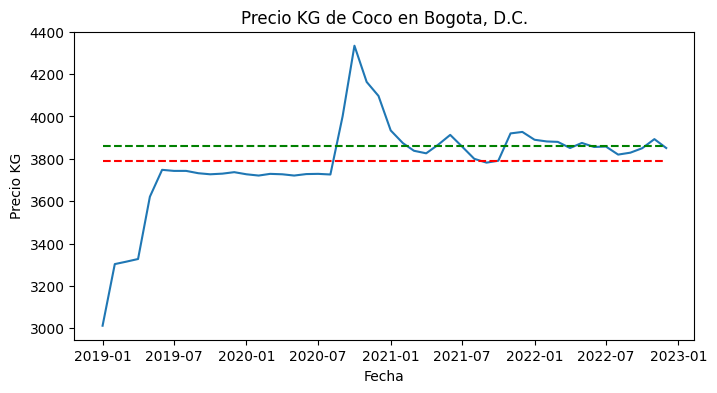

In [39]:
# here i noted that is is first necessary to call the size of the figure general atrubites like the x annd y labels 
# and then set every plot that we wanted
x = dfpc.index
y = dfpc['Precio KG']
y_avg = [np.mean(y)] * len(x)
y_22 = dfpc.loc["2022":"2023","Precio KG"]
y_avg22=[np.mean(y_22)]* len(x)
plt.figure(figsize=(8,4))
plt.title(t)
plt.xlabel('Fecha')
plt.ylabel('Precio KG')
plt.plot(x, y)
plt.plot(x, y_avg, color='red', ls='--')
plt.plot(x,y_avg22, color="green",ls="--")
plt.show()

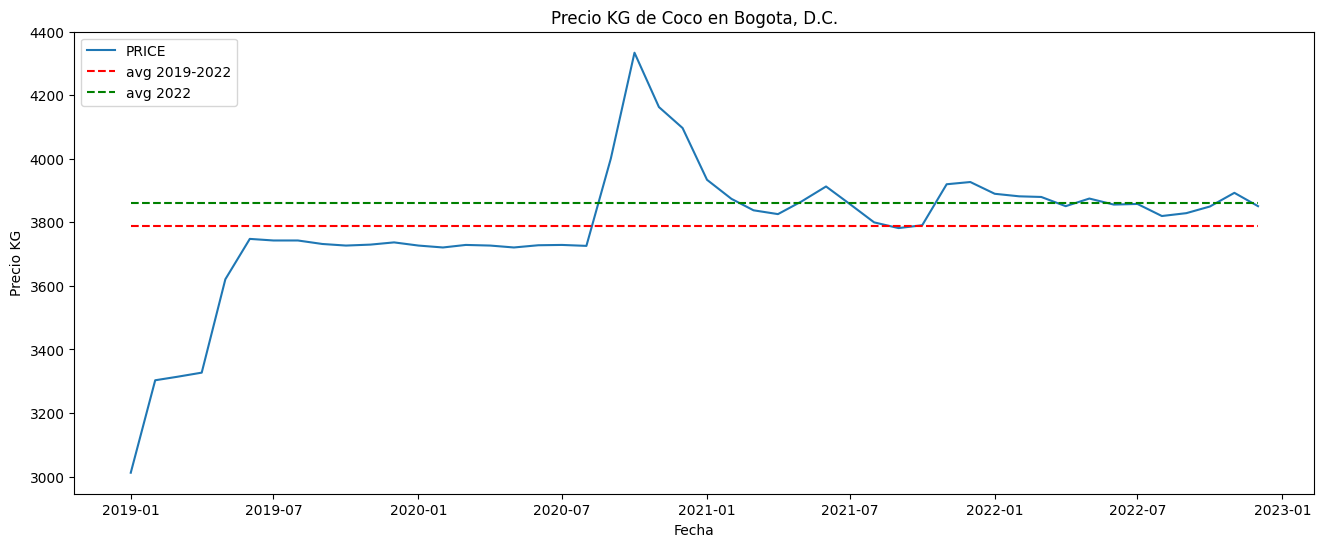

In [40]:
# here i noted that is is first necessary to call the size of the figure general atrubites like the x annd y labels 
# and then set every plot that we wanted
x = dfpc.index
y = dfpc['Precio KG']
y_avg = [np.mean(y)] * len(x)
y_22 = dfpc.loc["2022":"2023","Precio KG"]
y_avg22=[np.mean(y_22)]* len(x)
plt.figure(figsize=(16,6))
plt.title(t)
plt.xlabel('Fecha')
plt.ylabel('Precio KG')
sns.lineplot(data =dfpc,x='Fecha',y='Precio KG',label ='PRICE')
plt.plot(x, y_avg, color='red', ls='--',label ='avg 2019-2022')
plt.plot(x,y_avg22, color="green",ls="--",label='avg 2022')
plt.legend(loc="upper left")
plt.show()

# now you can see that thiss line of seaborn .plotline is a better fit for our data 
# as the blue line representes the mean of all the valuess and 
# the gradient blue will represent data that represent each mean of the day calculated 

In [41]:
# here we can see that for a single day of the month we get various values thanks to the different WHOLESALE markets
# that is why we get a timelinen gragh that does'nt look normal 
# maybe we should use other type of grapgh to better represent the differrent prices that you can see in a normal day 
dfpc.head()
'how to make a candle timeline in matplotlib'

'how to make a candle timeline in matplotlib'

<Axes: xlabel='Fecha', ylabel='Precio KG'>

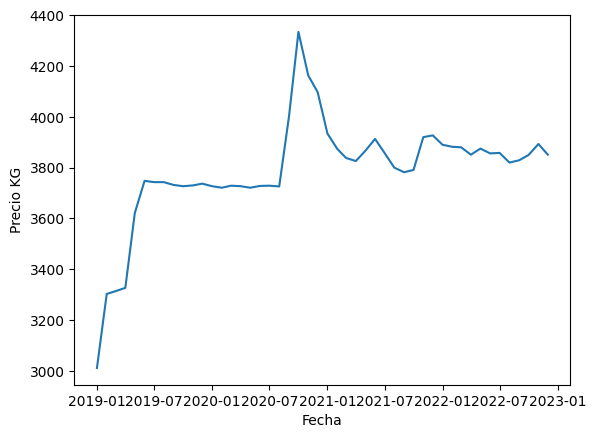

In [42]:
sns.lineplot(data=dfpc, x="Fecha", y="Precio KG")

In [43]:
# here you will find the prices with less and more variationa across the cities 
print(dfpc.describe().round())
print(t)
print(dfp.describe().round())

       Precio KG
count       48.0
mean      3788.0
std        211.0
min       3012.0
25%       3729.0
50%       3823.0
75%       3876.0
max       4334.0
Precio KG de Coco en Bogota, D.C.
       Precio KG
count      707.0
mean      3246.0
std       1091.0
min       1375.0
25%       2422.0
50%       3113.0
75%       3850.0
max       8165.0


In [44]:
# here we are seeing the product and its standart deviaation by citie 
# so we can see where are the products with less variation in its prices
# it is correct the clarify that less variation in the prices 
# doesn't necessarly meaan lower prices
std=dfp.groupby('Ciudad')['Precio KG'].std().round()
mis = std.nlargest(5)
mas = std.nsmallest(5)
print(mis)
print(mas)

Ciudad
Medellin             793.0
Monteria             774.0
Cartagena            681.0
Sincelejo            506.0
La Unión (Nariño)    496.0
Name: Precio KG, dtype: float64
Ciudad
Cúcuta                       158.0
Bogota, D.C.                 211.0
Palmira (Valle del Cauca)    261.0
Manizales                    313.0
Cartago (Valle del Cauca)    315.0
Name: Precio KG, dtype: float64


In [45]:
# here you can see that we use the same function to call the max a min values of the dataframe 
# maaybe we can use a function to save lines of code
M= dfp.groupby('Ciudad')['Precio KG'].mean()
mi = M.nlargest(5)
ma = M.nsmallest(5)
print(mi)
print(ma)

Ciudad
Medellin       5884.333333
Bucaramanga    4333.000000
Monteria       4121.851064
Cartagena      4036.541667
Valledupar     3878.846154
Name: Precio KG, dtype: float64
Ciudad
Cúcuta                       1832.166667
Palmira (Valle del Cauca)    2207.804348
Cali                         2240.510417
La Unión (Nariño)            2252.333333
Cartago (Valle del Cauca)    2572.765957
Name: Precio KG, dtype: float64


In [46]:
dfpc.loc['2019':'2019-12']

,Grupo,Producto,Precio KG,Ciudad,Plaza
Fecha,,,,,
2019-01-01,frutas,Coco,3012.0,"Bogota, D.C.",Corabastos
2019-02-01,frutas,Coco,3303.0,"Bogota, D.C.",Corabastos
2019-03-01,frutas,Coco,3314.0,"Bogota, D.C.",Corabastos
2019-04-01,frutas,Coco,3327.0,"Bogota, D.C.",Corabastos
2019-05-01,frutas,Coco,3621.0,"Bogota, D.C.",Corabastos
2019-06-01,frutas,Coco,3748.0,"Bogota, D.C.",Corabastos
2019-07-01,frutas,Coco,3743.0,"Bogota, D.C.",Corabastos
2019-08-01,frutas,Coco,3743.0,"Bogota, D.C.",Corabastos
2019-09-01,frutas,Coco,3732.0,"Bogota, D.C.",Corabastos


In [47]:
# i reset the index from date to the a normal index to then plot it is it results in a lot of problem using a 
# timestamp and trying to plot a scatterplot there is a incompatibility problem between matplotlib and seaborn and pandas timestamp


In [48]:
# dflin as dataframe linear analysis
dflin = dfpc.reset_index()

In [49]:
# HERE YOU CAN FIND THE mean of every year for posterrior analysis and graphics
# then i convert the series into a pandas dataframe to plot it more easily
n = dflin.groupby(dflin.Fecha.dt.year)['Precio KG'].mean()
# here we use a grioupby function to get the mean of every year selecting the grouping as .year and then plotting the price and the mean of it
# with this to_frame we convert this series into a pandas dataframe
Year_mean = n.to_frame(name="Precio Promedio")
# here i change the column name to better practices
Year_mean.columns =['Precio KG']

In [50]:
# here i should create a new column in the data frame with the length of the line that i want to plot 

In [51]:
n = dfpc.groupby(dfpc.index.year)['Precio KG'].mean()

Year_mean = n.to_frame(name="Precio Promedio")


In [52]:
dfpc['Promedio'] = dfpc.index.year

<ipython-input-52-2ef175b4a695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpc['Promedio'] = dfpc.index.year


In [53]:
Year_mean.head()

,Precio Promedio
Fecha,
2019,3561.416667
2020,3866.916667
2021,3860.750000
2022,3861.250000


In [54]:
# here we confirm that all done its right
n.index

Int64Index([2019, 2020, 2021, 2022], dtype='int64', name='Fecha')

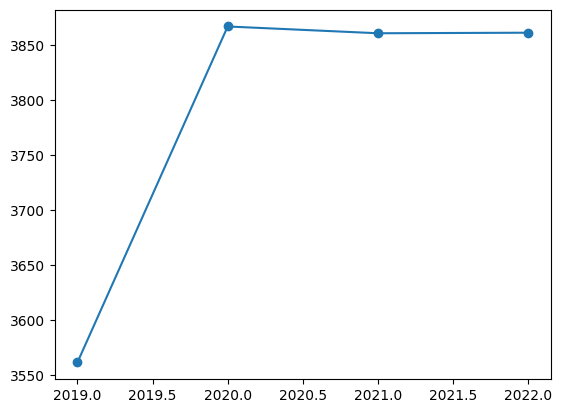

In [56]:
# here we plotted the variation of the mean price by year
Year_mean_x = Year_mean.index
Year_mean_y = Year_mean['Precio Promedio']
plt.plot(Year_mean_x,Year_mean_y,label='avg 2022',marker="o")

<Axes: xlabel='Fecha', ylabel='Precio Promedio'>

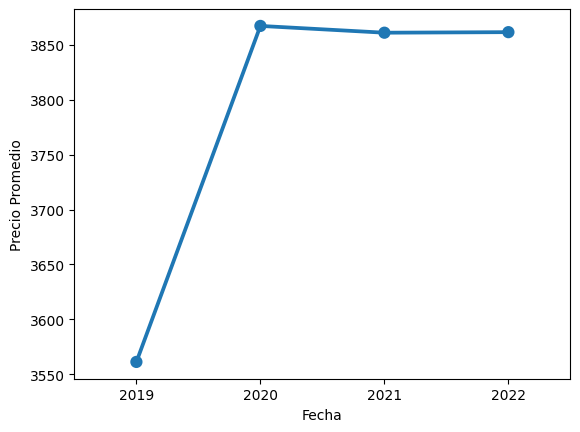

In [57]:
sns.pointplot(data=Year_mean, x=Year_mean_x, y=Year_mean_y)

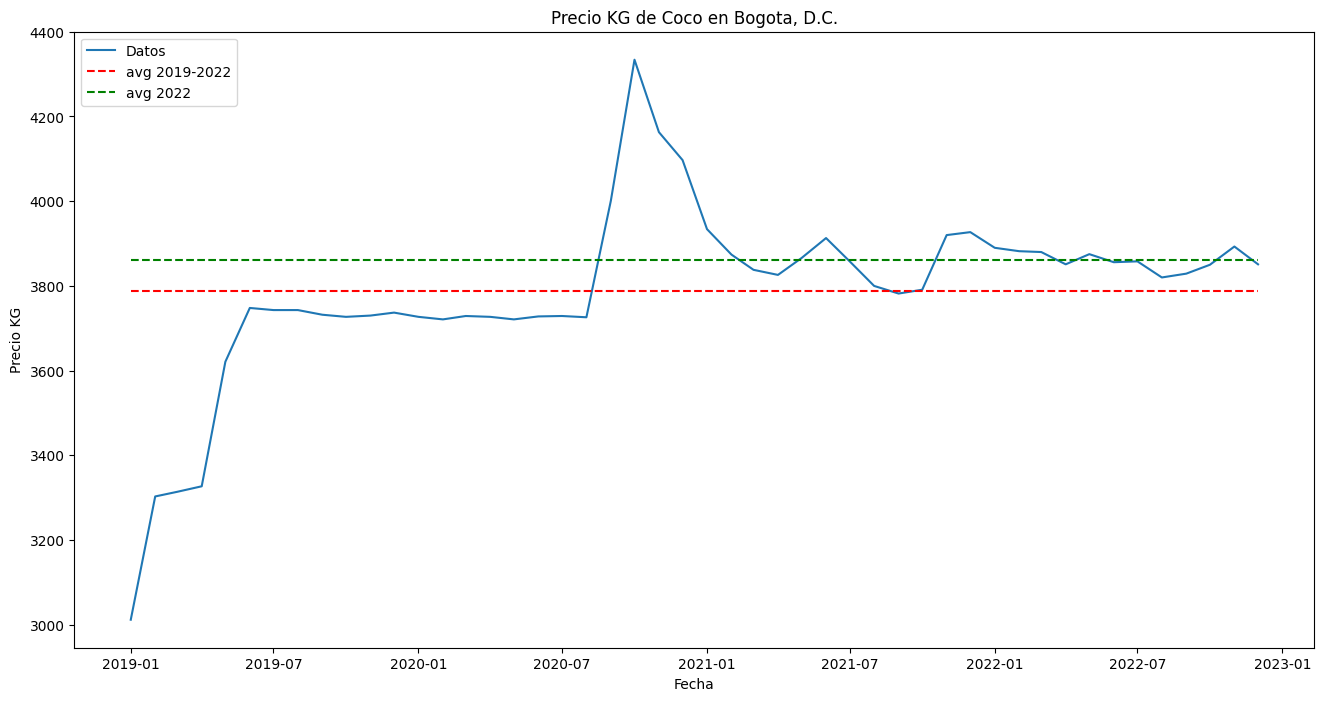

In [58]:
x = dfpc.index
y = dfpc['Precio KG']
y_avg = [np.mean(y)] * len(x)
y_22 = dfpc.loc["2022":"2023","Precio KG"]
y_avg22=[np.mean(y_22)]* len(x)
Year_mean_x = Year_mean.index
Year_mean_y = Year_mean['Precio Promedio']
plt.figure(figsize=(16,8))
plt.title(t)
plt.xlabel('Fecha')
plt.ylabel('Precio KG')
sns.lineplot(data =dfpc,x='Fecha',y='Precio KG',label ='Datos')
plt.plot(x, y_avg, color='red', ls='--',label ='avg 2019-2022')
plt.plot(x,y_avg22, color="green",ls="--",label='avg 2022')
plt.legend(loc="upper left")
plt.show()



<Axes: ylabel='Precio KG'>

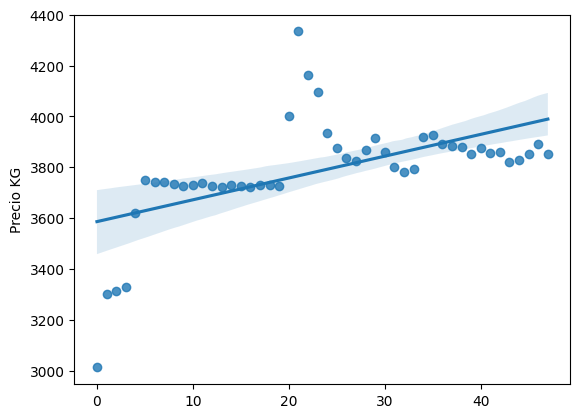

In [59]:
# here now i need to use a dict to plot the year insstead of the number of every index 
sns.regplot(x=dflin.index, y=dflin['Precio KG'])


In [60]:
dfpc.head()

,Grupo,Producto,Precio KG,Ciudad,Plaza,Promedio
Fecha,,,,,,
2019-01-01,frutas,Coco,3012.0,"Bogota, D.C.",Corabastos,2019
2019-02-01,frutas,Coco,3303.0,"Bogota, D.C.",Corabastos,2019
2019-03-01,frutas,Coco,3314.0,"Bogota, D.C.",Corabastos,2019
2019-04-01,frutas,Coco,3327.0,"Bogota, D.C.",Corabastos,2019
2019-05-01,frutas,Coco,3621.0,"Bogota, D.C.",Corabastos,2019


In [61]:
dflin.head()

,Fecha,Grupo,Producto,Precio KG,Ciudad,Plaza
0,2019-01-01,frutas,Coco,3012.0,"Bogota, D.C.",Corabastos
1,2019-02-01,frutas,Coco,3303.0,"Bogota, D.C.",Corabastos
2,2019-03-01,frutas,Coco,3314.0,"Bogota, D.C.",Corabastos
3,2019-04-01,frutas,Coco,3327.0,"Bogota, D.C.",Corabastos
4,2019-05-01,frutas,Coco,3621.0,"Bogota, D.C.",Corabastos


In [62]:
# here with the index using the last 12 values of the month but this will work only with a unique value 
# if you have more cities or wholase centers you will not have the data of a year but only
# the last 12 values of the data frame
dflin.iloc[-12:,:]

,Fecha,Grupo,Producto,Precio KG,Ciudad,Plaza
36,2022-01-01,frutas,Coco,3890.0,"Bogota, D.C.",Corabastos
37,2022-02-01,frutas,Coco,3882.0,"Bogota, D.C.",Corabastos
38,2022-03-01,frutas,Coco,3880.0,"Bogota, D.C.",Corabastos
39,2022-04-01,frutas,Coco,3851.0,"Bogota, D.C.",Corabastos
40,2022-05-01,frutas,Coco,3875.0,"Bogota, D.C.",Corabastos
41,2022-06-01,frutas,Coco,3856.0,"Bogota, D.C.",Corabastos
42,2022-07-01,frutas,Coco,3858.0,"Bogota, D.C.",Corabastos
43,2022-08-01,frutas,Coco,3820.0,"Bogota, D.C.",Corabastos
44,2022-09-01,frutas,Coco,3829.0,"Bogota, D.C.",Corabastos
45,2022-10-01,frutas,Coco,3850.0,"Bogota, D.C.",Corabastos


In [63]:
prueba = dfpc
prueba.head()

,Grupo,Producto,Precio KG,Ciudad,Plaza,Promedio
Fecha,,,,,,
2019-01-01,frutas,Coco,3012.0,"Bogota, D.C.",Corabastos,2019
2019-02-01,frutas,Coco,3303.0,"Bogota, D.C.",Corabastos,2019
2019-03-01,frutas,Coco,3314.0,"Bogota, D.C.",Corabastos,2019
2019-04-01,frutas,Coco,3327.0,"Bogota, D.C.",Corabastos,2019
2019-05-01,frutas,Coco,3621.0,"Bogota, D.C.",Corabastos,2019


In [64]:
# here we are using the index and convert it to a string 
prueba.index = (prueba.index.strftime("%m/%d/%Y"))

In [65]:
# there is a problem in the conversion between matplotlib and csipy you could usse 
# then i change the index to a normal array instead of using the Date Time
dfs = prueba.iloc[-12:,:]
xs = dfs.index
ys = dfs['Precio KG']
lin_ress = linregress(xs,ys)

TypeError: ignored

In [ ]:
dfs.index

In [ ]:
sns.regplot(x=xs ,y = ys ,data=dfs)

In [ ]:
dfpc.info()

In [ ]:
x=dfpc.index
y=dfpc['Precio KG']
plt.title(t)
plt.xlabel('Fecha')
plt.ylabel('Precio KG')
plt.scatter(x,y)
plt.show

#General Analysis 


In [66]:
# here dfgc means dataframe group and city
dfgc = df2[df2['Ciudad'].isin(C)]
dfgc.head()

,Grupo,Producto,Precio KG,Ciudad,Plaza
Fecha,,,,,
2019-01-01,frutas,Aguacate Hass,3972.0,"Bogota, D.C.",Corabastos
2019-01-01,frutas,Aguacate papelillo,4379.0,"Bogota, D.C.",Corabastos
2019-01-01,frutas,Banano criollo,1158.0,"Bogota, D.C.",Corabastos
2019-01-01,frutas,Banano Uraba,1079.0,"Bogota, D.C.",Corabastos
2019-01-01,frutas,Borojó,3107.0,"Bogota, D.C.",Corabastos


In [79]:
dfgc.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01',
               ...
               '2022-12-01', '2022-12-01', '2022-12-01', '2022-12-01',
               '2022-12-01', '2022-12-01', '2022-12-01', '2022-12-01',
               '2022-12-01', '2022-12-01'],
              dtype='datetime64[ns]', name='Fecha', length=2424, freq=None)

In [67]:
dfgc["Precio KG"].nsmallest(15)

Fecha
2019-03-01    788.0
2019-01-01    804.0
2021-03-01    813.0
2020-12-01    816.0
2020-09-01    822.0
2019-02-01    827.0
2020-05-01    831.0
2020-05-01    838.0
2020-08-01    853.0
2021-07-01    860.0
2020-04-01    863.0
2021-06-01    872.0
2021-04-01    881.0
2019-04-01    885.0
2021-09-01    885.0
Name: Precio KG, dtype: float64

In [68]:
# here we find some of the min values across all the months
equis = dfgc["Precio KG"] == 885
dfgc[equis]

,Grupo,Producto,Precio KG,Ciudad,Plaza
Fecha,,,,,
2019-04-01,frutas,Patilla,885.0,"Bogota, D.C.",Corabastos
2021-09-01,frutas,Piña perolera,885.0,"Bogota, D.C.",Corabastos


In [ ]:
# that shows this result isn't correct
dfgc = df2[df2['Ciudad'].isin(C)]
prueba_2 = dfgc.groupby([dfgc.index.month,"Producto"])['Precio KG'].mean()
prueba_2 = prueba_2.to_frame()
prueba_2.reset_index(inplace = True)
prueba_2['Precio KG'].nsmallest()
prueba_2.groupby(['Fecha'])["Precio KG","Producto"].min()


In [155]:
#we grouped the prices by produt in month and get the mean of the product around all the same januaries for example
prueba_2 = dfgc.groupby([dfgc.index.month,"Producto"])['Precio KG'].mean()# this gives us the mean of the price by product grouped in month
prueba_2 = prueba_2.to_frame() # to convert the dataframe
prueba_2.reset_index(inplace = True) # to change to multi index to a normal one
prueba_2['Fecha'] # to then see if the fecha is a new column to use it as the month to group

0       1
1       1
2       1
3       1
4       1
       ..
642    12
643    12
644    12
645    12
646    12
Name: Fecha, Length: 647, dtype: int64

In [150]:
# a test to find the min value for a month in the dataframe
m =1
month_price = prueba_2['Fecha'] == m # this boolean can check for a variable that is the number of the month
lista = prueba_2[month_price] # here we translate the bool into a dataframe
min_index = lista['Precio KG'].idxmin() # this will give you the index number of the minimun price value
lista.loc[min_index] # we use the variable to then call the product


Fecha              1
Producto     Patilla
Precio KG     1138.0
Name: 38, dtype: object

In [156]:
# now we can pass this into the loop to do it for every month
# a for loop to get the min value of every month
for month in range(12):
  month +=1
  month_price = prueba_2['Fecha'] == month
  lista = prueba_2[month_price]
  min_index = lista['Precio KG'].idxmin()
  min_price_month = lista.loc[min_index]
  print(min_price_month)

Fecha              1
Producto     Patilla
Precio KG     1138.0
Name: 38, dtype: object
Fecha              2
Producto     Patilla
Precio KG     1092.5
Name: 92, dtype: object
Fecha              3
Producto     Patilla
Precio KG     1025.5
Name: 146, dtype: object
Fecha                    4
Producto     Piña perolera
Precio KG            980.0
Name: 206, dtype: object
Fecha                    5
Producto     Piña perolera
Precio KG           1149.0
Name: 259, dtype: object
Fecha                   6
Producto     Limón Tahiti
Precio KG         1090.25
Name: 287, dtype: object
Fecha                    7
Producto     Piña perolera
Precio KG           1021.5
Name: 367, dtype: object
Fecha                    8
Producto     Piña perolera
Precio KG           1018.5
Name: 421, dtype: object
Fecha                    9
Producto     Piña perolera
Precio KG          1141.25
Name: 475, dtype: object
Fecha                   10
Producto     Piña perolera
Precio KG           1209.5
Name: 529, dtype: object

In [ ]:
# how can we get the min 3 values of a month?
# a test to find the min value for a month in the dataframe
m =1
month_price = prueba_2['Fecha'] == m # this boolean can check for a variable that is the number of the month
lista = prueba_2[month_price] # here we translate the bool into a dataframe
min_index = lista['Precio KG'].idxmin() # this will give you the index number of the minimun price value
lista.loc[min_index] # we use the variable to then call the product

In [99]:
# here i would like to acces a month
dfpc.loc[1]

KeyError: ignored

In [ ]:
prueba_2.groupby(["Fecha"])

In [ ]:
# Here i want to group by month and mean of all the 4 years to then search for the
# we should then search for the min value of a product in every month
prueba_2 = dfgc.groupby([dfgc.index.month,"Producto"])['Precio KG'].mean()
prueba_2 = prueba_2.to_frame()

In [ ]:
prueba_2.reset_index(inplace = True)

In [ ]:
prueba_2.loc[:50]

In [ ]:
x = prueba_2['Precio KG'].nsmallest(12)

In [ ]:
x

In [ ]:
prueba_2.index

In [ ]:
mini = prueba_2.groupby(["Fecha","Producto"])['Precio KG'].min()

In [ ]:
mini

In [ ]:
for 

In [ ]:
prueba_2.groupby(['Fecha'])["Producto"]


In [ ]:
prueba_2[producto]